<a href="https://colab.research.google.com/github/WantKakao/deep_learning/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [34]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Feature Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

Training the SOM

In [25]:
!pip install minisom

In [36]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

Visualizing the result

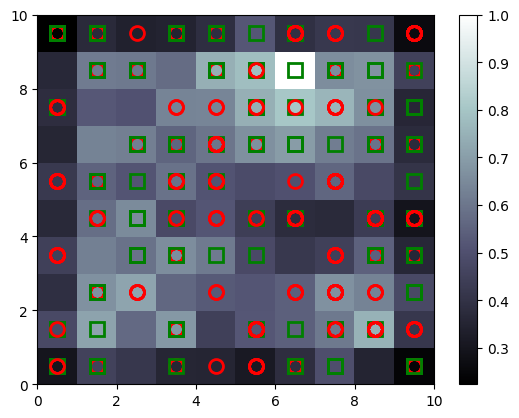

In [37]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

Finding the frauds

In [39]:
mappings = som.win_map(X)
frauds = mappings[(6, 8)]
# 두개 이상일 시
# frauds = np.concatenate((mappings[(6, 8)], mappings[(8, 1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [40]:
print(frauds)

[[1.5790113e+07 1.0000000e+00 1.7500000e+01 2.2000000e+01 3.0000000e+00
  1.0000000e+00 7.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 3.0000000e+00 4.5000000e+02 1.0000100e+05]]
